1. Importación de librerías y configuración

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Configuración de visualización
plt.style.use('default')
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 8)

2. Carga de datos

In [8]:
# Carga de datos
df = pd.read_csv('../data/chatbot_satisfaction_dataset_utf8.csv')
df.head()

,id_estudiante,fecha_consulta,derivado,tipo_consulta,urgencia,tiempo_consulta,tiempo_espera,id_asesor,calidad_del_servicio,consulta_resuelta,satisfaccion_estudiante,indice_promotor_neto,puntaje_esfuerzo_cliente,mes_consulta
0,E00001,2024-09-20,True,Solicitud de documentos,Media,2436,1159,A215,1,False,5,-2,3,septiembre
1,E00002,2023-02-07,False,Información general,Baja,2699,1163,A192,3,True,5,19,4,febrero
2,E00003,2024-10-04,True,Información general,Media,1062,434,A242,2,False,4,48,2,octubre
3,E00004,2023-10-24,True,Solicitud de documentos,Baja,663,620,A007,3,True,2,88,3,octubre
4,E00005,2024-12-31,True,Solicitud de documentos,Baja,2376,164,A259,1,True,4,23,4,diciembre


3. Cálculo de correlaciones de Pearson con la variable objetivo

In [9]:
# Selección de variables numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Cálculo de correlaciones con la variable objetivo
correlations = df[numeric_columns].corr()['satisfaccion_estudiante'].sort_values(ascending=False)
correlations = correlations.drop('satisfaccion_estudiante')
correlations

puntaje_esfuerzo_cliente    0.002890
indice_promotor_neto        0.000974
tiempo_espera              -0.001505
calidad_del_servicio       -0.005397
tiempo_consulta            -0.006359
Name: satisfaccion_estudiante, dtype: float64

4. Visualización de correlaciones (gráfico de barras)

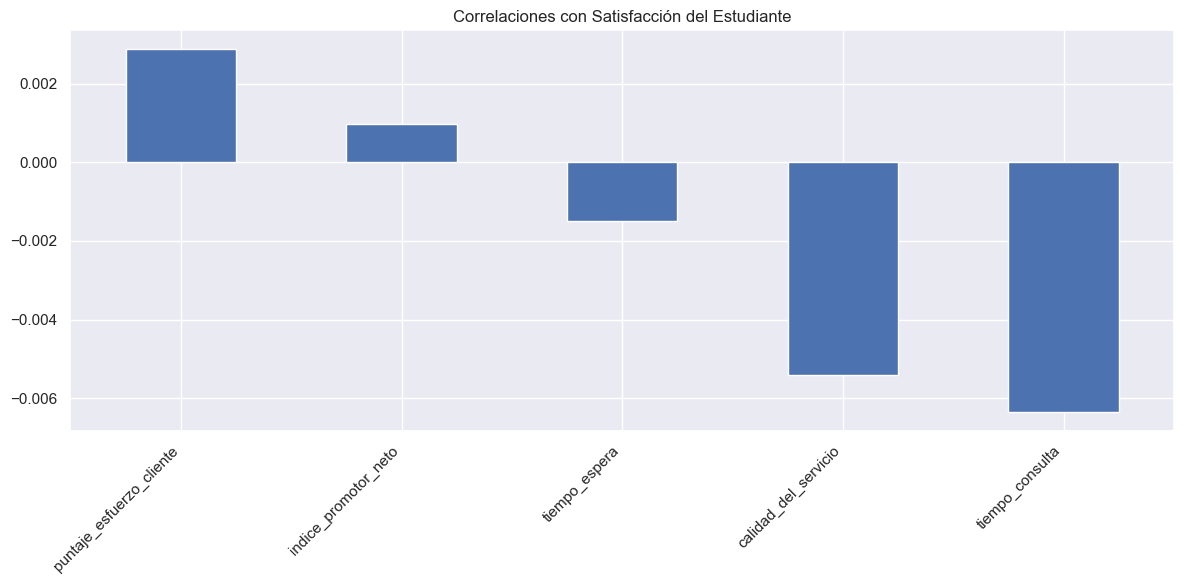

In [10]:
plt.figure(figsize=(12, 6))
correlations.plot(kind='bar')
plt.title('Correlaciones con Satisfacción del Estudiante')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

5. Matriz de correlaciones (heatmap)

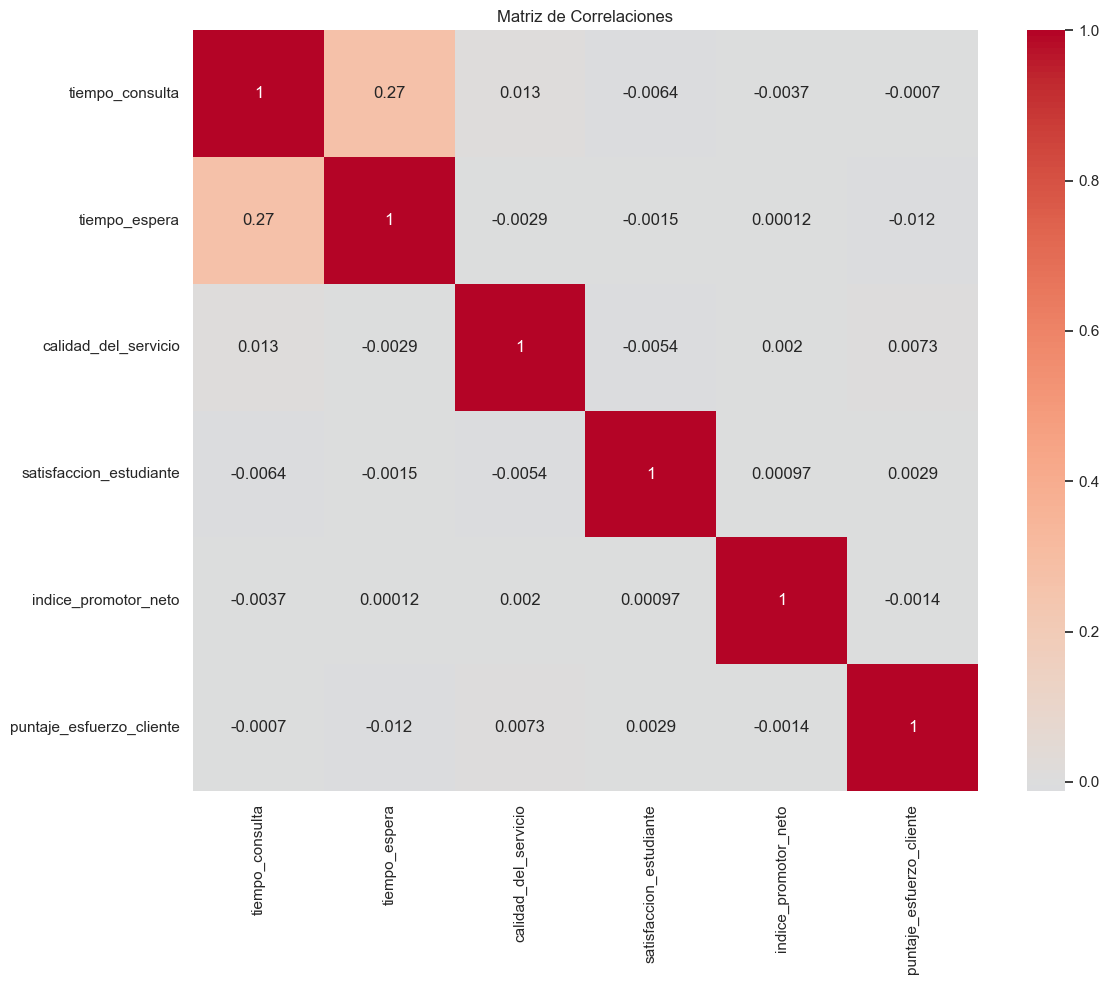

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlaciones')
plt.tight_layout()
plt.show()

6. Hipótesis y significancia estadística

In [13]:
n = len(df)
for var, corr in correlations.items():
    p_value = stats.pearsonr(df[var], df['satisfaccion_estudiante'])[1]
    significance = 'significativa' if p_value < 0.05 else 'no significativa'
    direction = 'positiva' if corr > 0 else 'negativa'
    print(f'Variable: {var}')
    print(f'Correlación: {corr:.3f} ({direction})')
    print(f'Significancia: {significance} (p-value: {p_value:.4f})')
    print(f'Hipótesis: Existe una correlación {direction} {significance} entre {var} y la satisfacción del estudiante.')
    print('-' * 80)

Variable: puntaje_esfuerzo_cliente
Correlación: 0.003 (positiva)
Significancia: no significativa (p-value: 0.6166)
Hipótesis: Existe una correlación positiva no significativa entre puntaje_esfuerzo_cliente y la satisfacción del estudiante.
--------------------------------------------------------------------------------
Variable: indice_promotor_neto
Correlación: 0.001 (positiva)
Significancia: no significativa (p-value: 0.8661)
Hipótesis: Existe una correlación positiva no significativa entre indice_promotor_neto y la satisfacción del estudiante.
--------------------------------------------------------------------------------
Variable: tiempo_espera
Correlación: -0.002 (negativa)
Significancia: no significativa (p-value: 0.7944)
Hipótesis: Existe una correlación negativa no significativa entre tiempo_espera y la satisfacción del estudiante.
--------------------------------------------------------------------------------
Variable: calidad_del_servicio
Correlación: -0.005 (negativa)
Sign

7. Visualización de relaciones bivariadas (scatterplots)


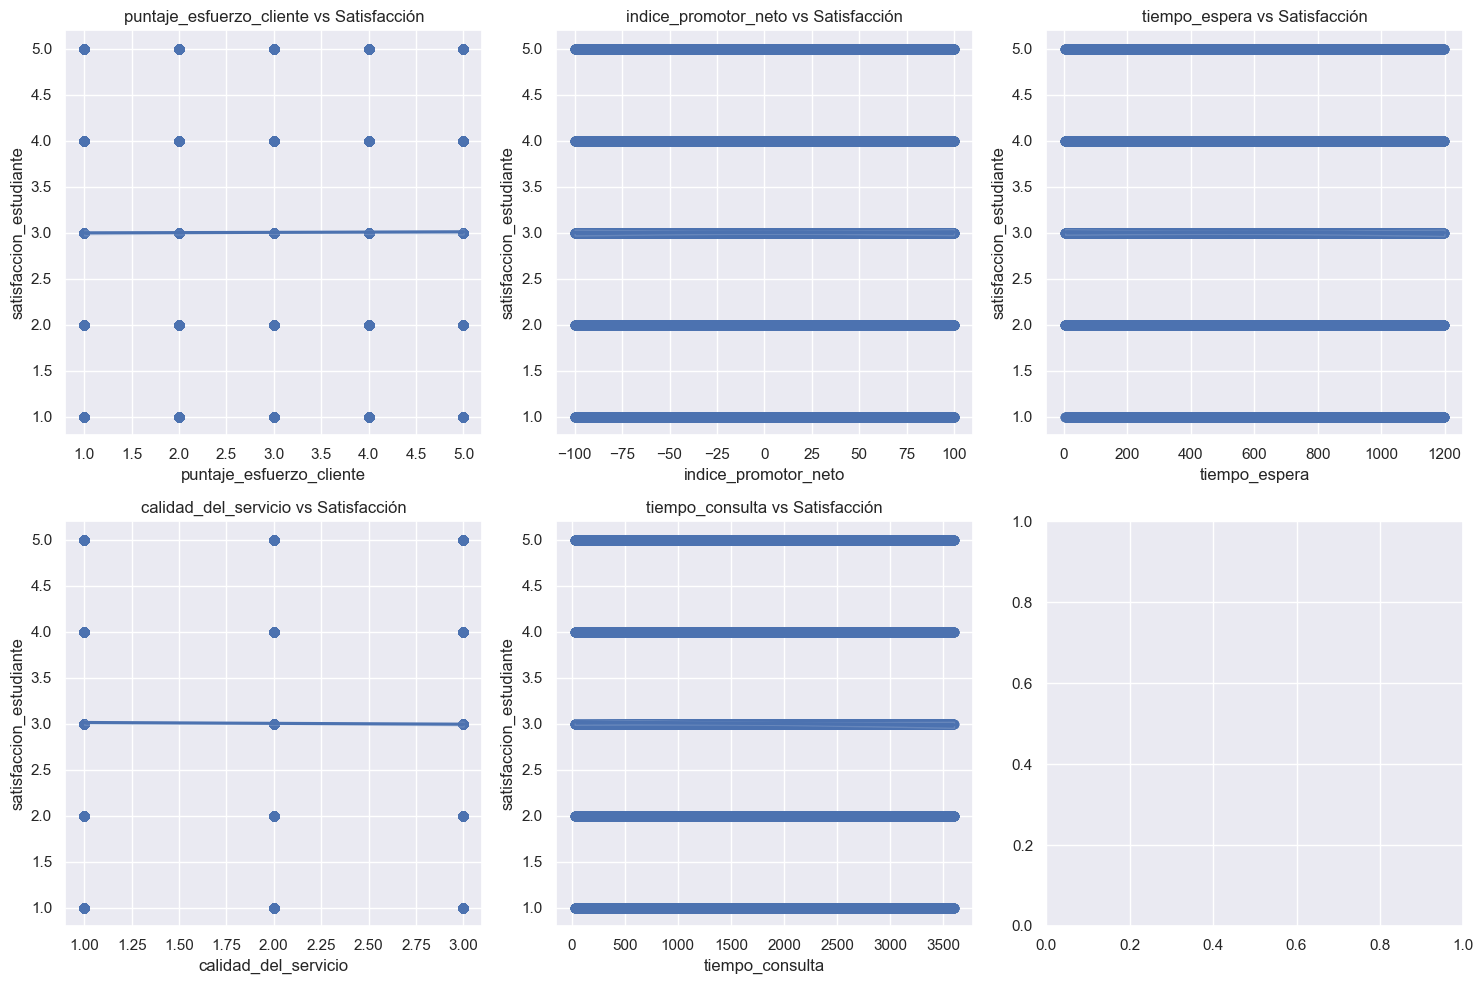

In [14]:
top_correlations = correlations.head(5).index
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, var in enumerate(top_correlations):
    sns.regplot(data=df, x=var, y='satisfaccion_estudiante', ax=axes[idx])
    axes[idx].set_title(f'{var} vs Satisfacción')

plt.tight_layout()
plt.show()

8. Conclusiones (Markdown) ## Conclusiones

- Las correlaciones y su significancia se muestran arriba.
- Considera las variables con correlaciones más altas y significativas para modelos predictivos.
- Si ninguna variable es significativa, puede ser necesario explorar variables categóricas, crear nuevas variables o revisar la calidad de los datos.